# Shraddha Patil
# Data Science & Business Analytics
# Task 1 : Prediction using Supervised ML

# Importing Libraries(numpy & pandas)

In [1]:
# Importing Python Libraries (numpy and pandas)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Loading Data 

url="http://bit.ly/w-data"
data=pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

In [2]:
# # Data structure
data.shape

(25, 2)

In [3]:
#Describe the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#Relation between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Visualizing Dataset

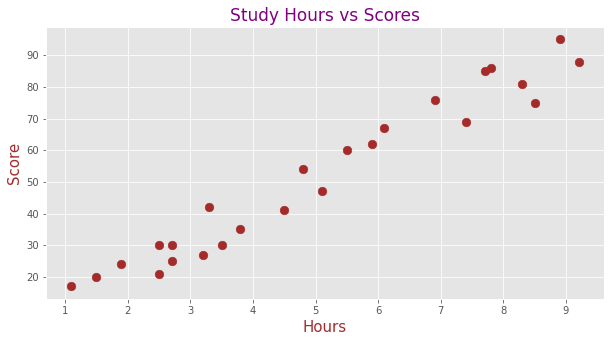

In [5]:
# Plotting the Data
plt.figure(figsize=(10,5))
plt.title('Study Hours vs Scores',fontsize=17,color="Purple")
plt.xlabel('Hours',fontsize=15,color="brown")
plt.ylabel('Score',fontsize=15,color="brown")
plt.scatter(data.Hours,data.Scores,s=75,color="brown")
plt.show()

# Data Preparation

In [6]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
#  Dataset into input and output Dataset
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
print(f'X: {X.shape}')
print(f'Y: {y.shape}')

X: (25, 1)
Y: (25,)


In [8]:
# Splitting dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
# Structure of training & testing Dataset
heading=['X_train','X_test','y_train','y_test']
value=[X_train,X_test,y_train,y_test]
for i in range(len(heading)):
    print(f'{heading[i]}:{value[i]}')

X_train:[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
X_test:[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_train:[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
y_test:[20 27 69 30 62]


In [10]:
# Shape of dataset
for i in range(len(heading)):
    print(f'{heading[i]}:{value[i].shape}')

X_train:(20, 1)
X_test:(5, 1)
y_train:(20,)
y_test:(5,)


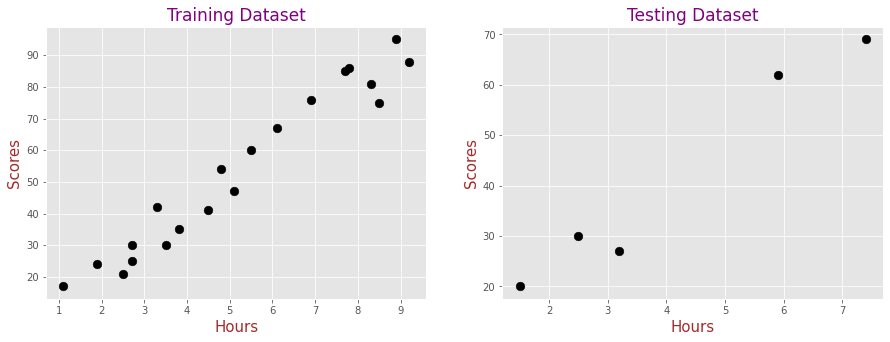

In [11]:
# Graph Plotting Distribution of Dataset
fig, graph=plt.subplots(1,2, figsize=(15,5))
graph[0].set_title('Training Dataset',fontsize=17,color="purple")
graph[0].scatter(X_train,y_train,s=75,color="black")
graph[0].set_xlabel('Hours',fontsize=15,color="brown")
graph[0].set_ylabel('Scores',fontsize=15,color="brown")
graph[1].set_title('Testing Dataset',fontsize=17,color="purple")
graph[1].scatter(X_test,y_test,s=75,color="black")
graph[1].set_xlabel('Hours',fontsize=15,color="brown")
graph[1].set_ylabel('Scores',fontsize=15,color="brown")
plt.show()

# Linear Regression 

In [12]:
#Coefficient & Intercept
reg=LinearRegression()
reg.fit(X_train, y_train)
print(f'Coefficient : {reg.coef_}')
print(f'Intercept : {reg.intercept_}')

Coefficient : [9.91065648]
Intercept : 2.018160041434683


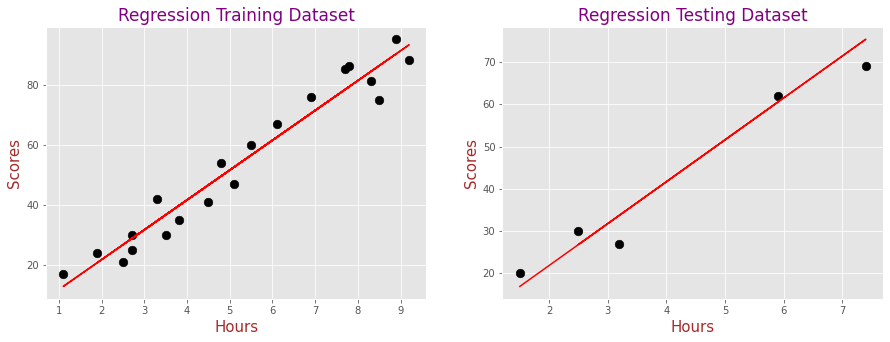

In [13]:
# Plotting Regression Lines
fig, graph=plt.subplots(1,2, figsize=(15,5))
graph[0].set_title('Regression Training Dataset',fontsize=17,color="purple")
graph[0].scatter(X_train,y_train,s=75,color="black")
graph[0].plot(X_train,reg.coef_*X_train+reg.intercept_, '-r')
graph[0].set_xlabel('Hours',fontsize=15,color="brown")
graph[0].set_ylabel('Scores',fontsize=15,color="brown")
graph[1].set_title('Regression Testing Dataset',fontsize=17,color="purple")
graph[1].scatter(X_test,y_test,s=75,color="black")
graph[1].plot(X_test,reg.coef_*X_test+reg.intercept_, '-r')
graph[1].set_xlabel('Hours',fontsize=15,color="brown")
graph[1].set_ylabel('Scores',fontsize=15,color="brown")
plt.show()

# Predictions on Dataset

In [14]:
# Making Predictions
y_pred=reg.predict(X_test).astype(int)
pd.DataFrame({'Hours':X_test[:,0],'Actual Score':y_test,'Predicted Score':y_pred})

,Hours,Actual Score,Predicted Score
0,1.5,20,16
1,3.2,27,33
2,7.4,69,75
3,2.5,30,26
4,5.9,62,60


# Evaluation of Data

In [15]:
# Evaluation
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Sum Of Squares(MSE): {metrics.mean_squared_error(y_test,y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test,y_pred)}')

Mean Absolute Error(MAE): 4.4
Sum Of Squares(MSE): 21.6
R2-Score: 0.9454875832828589


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
hours=9.25
score=reg.predict([[hours]]).astype(int)
pd.DataFrame({'Hours':hours,'Predicted Score':score})

,Hours,Predicted Score
0,9.25,93


# Thank You